# Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn import metrics

# Data exploration

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
numerical_features = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years"]
categorical_featues = ["Department", "salary"]
n_nf = len(numerical_features)
n_cf = len(categorical_featues)
n_nf + n_cf

9

In [6]:
df.isna().any().sum()

0

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Total rows --> 14999
### Total columns --> 10
### Categorical features --> 2 - ["Department", "salary"]
### Numerical features --> 7 - ["satisfaction_level","last_evaluation","number_project", "average_montly_hours", "time_spend_company","Work_accident","promotion_last_5years"]
### No na values

# EDA

In [10]:
df_retained = df[df.left == 0]
df_left = df[df.left == 1]

In [11]:
df_retained.shape

(11428, 10)

In [33]:
df_left.shape

(3571, 10)

In [34]:
for col in numerical_features :
    x = df_retained[col].mean()
    y = df_left[col].mean()
    z = df[col].mean()
    print(f"{col}\nRetention : {x}, Left : {y}, Overall : {z}\n")

satisfaction_level
Retention : 0.666809590479516, Left : 0.44009801176140917, Overall : 0.6128335222348166

last_evaluation
Retention : 0.7154733986699274, Left : 0.7181125735088183, Overall : 0.7161017401159978

number_project
Retention : 3.786664333216661, Left : 3.8555026603192384, Overall : 3.80305353690246

average_montly_hours
Retention : 199.0602030101505, Left : 207.41921030523662, Overall : 201.0503366891126

time_spend_company
Retention : 3.3800315015750786, Left : 3.876505180621675, Overall : 3.498233215547703

Work_accident
Retention : 0.17500875043752187, Left : 0.047325679081489776, Overall : 0.1446096406427095

promotion_last_5years
Retention : 0.026251312565628283, Left : 0.005320638476617194, Overall : 0.021268084538969265



In [36]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


(left       0     1
 salary            
 high     942    48
 low     4566  1174
 medium  4492   769,
 <AxesSubplot:xlabel='salary'>)

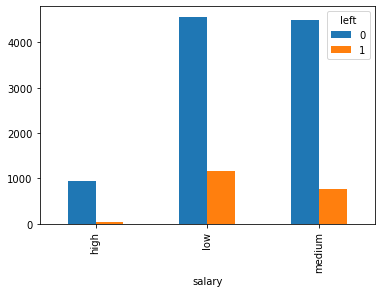

In [146]:
pd.crosstab(df.salary, df.left), pd.crosstab(df.salary, df.left).plot(kind="bar")

(left            0    1
 Department            
 IT            818  158
 RandD         609   85
 accounting    512  109
 hr            488  113
 management    384   52
 marketing     561  112
 product_mng   576  110
 sales        2689  550
 support      1509  312
 technical    1854  390,
 <AxesSubplot:xlabel='Department'>)

<Figure size 1440x864 with 0 Axes>

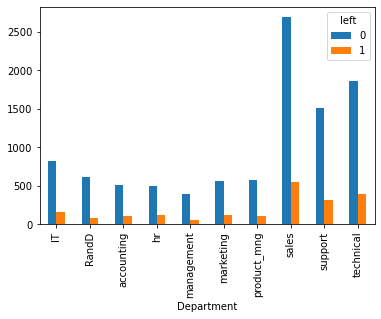

In [138]:
pd.crosstab(df.Department, df.left), pd.crosstab(df.Department, df.left).plot(kind="bar")

### Employees retention depends upon satisfaction_level, average_monthly_hours, promotion_last_5years, salary

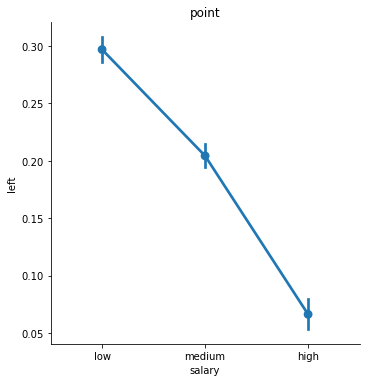

In [80]:
plots = ["point"]
for plot in plots :
    sns.catplot(x="salary", y="left", data=df, kind=plot).set(title=plot)

# Data Preprocessing

In [81]:
df = df.drop_duplicates()
df = df.reset_index()

In [82]:
df.shape

(11991, 11)

In [84]:
df_1 = df[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary", "left"]]
df_1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [89]:
dummies = pd.get_dummies(df_1.salary)
df_2 = pd.concat([df_1, dummies], axis=1)
df_2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,high,low,medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0


In [91]:
df_2 = df_2.drop(["salary", "medium"], axis=1)
df_2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,high,low
0,0.38,157,0,1,0,1
1,0.80,262,0,1,0,0
2,0.11,272,0,1,0,0
3,0.72,223,0,1,0,1
4,0.37,159,0,1,0,1


<Figure size 1440x144 with 0 Axes>

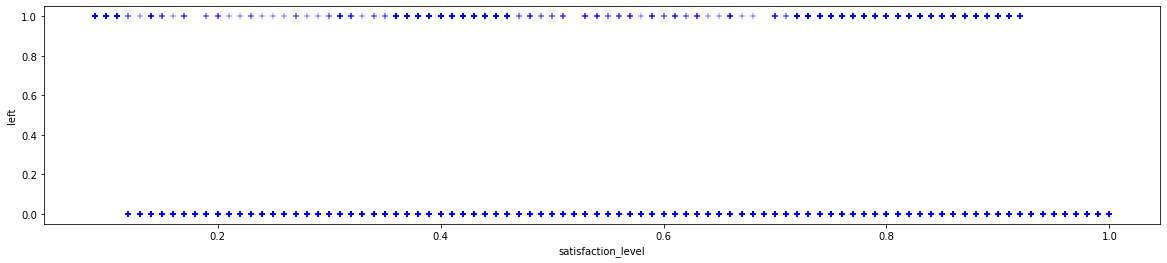

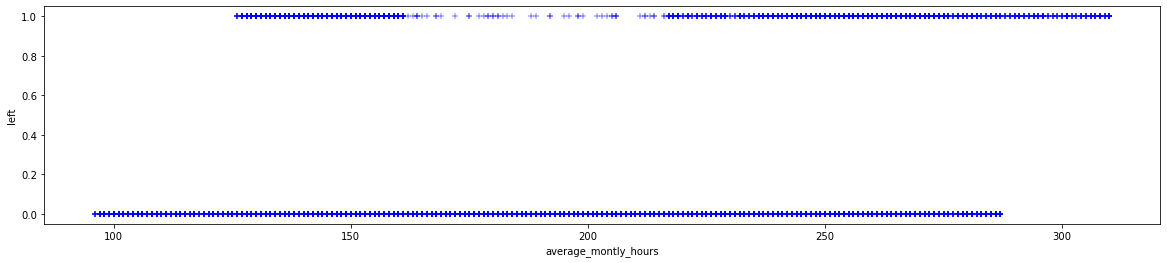

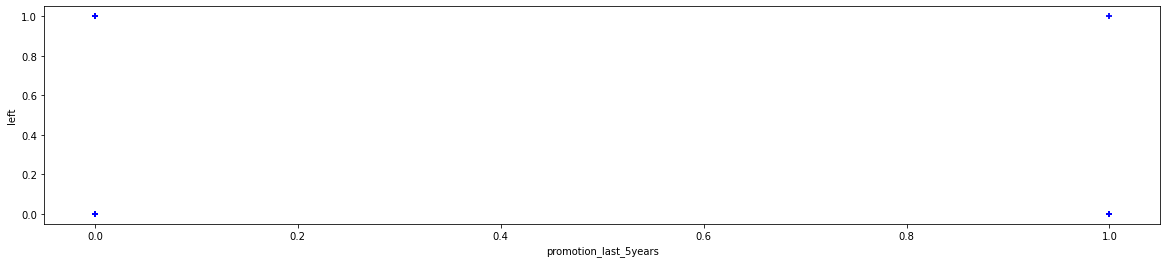

In [149]:
# Plotting scatter plots for numerical features
features_for_scatter_plot = ["satisfaction_level", "average_montly_hours", "promotion_last_5years"]
plt.figure(figsize=(20,2))
for feat in features_for_scatter_plot :
    plt.figure(figsize=(20,4))
    sns.scatterplot(x=feat,y="left",data=df_2, color="blue", marker="+")

### Scaling the data

In [162]:
df_changes = df_2.copy()
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_changes["scaled_monthly_hrs"] = mms.fit_transform(df_changes[["average_montly_hours"]])

In [163]:
df_changes.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,high,low,scaled_monthly_hrs
0,0.38,157,0,1,0,1,0.285047
1,0.80,262,0,1,0,0,0.775701
2,0.11,272,0,1,0,0,0.822430
3,0.72,223,0,1,0,1,0.593458
4,0.37,159,0,1,0,1,0.294393


<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

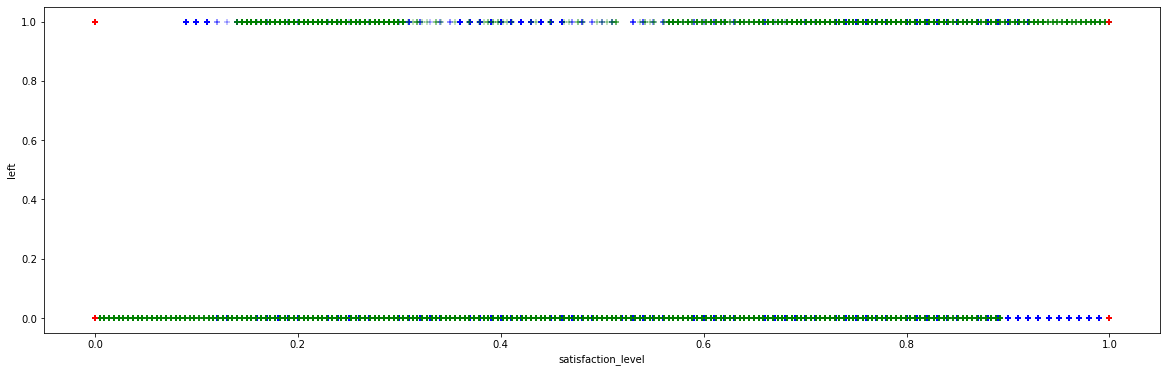

In [178]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="satisfaction_level", y="left",data=df_changes, color="blue", marker="+")
sns.scatterplot(x="scaled_monthly_hrs", y="left",data=df_changes, color="green", marker="+")
sns.scatterplot(x="promotion_last_5years", y="left",data=df_changes, color="red", marker="+")

## Splicing of data

In [179]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

df_final_2 = df_changes.copy()
X = df_final_2.drop(["left", "average_montly_hours"],axis=1)
y = df_final_2.left
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [187]:
X_train.shape

(9592, 5)

In [188]:
X_test.shape

(2399, 5)

In [189]:
y_train.shape

(9592,)

In [190]:
y_test.shape

(2399,)

# Model creation and hyper parameter tuning

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [127]:
model_params = {
    "logistic_regression" : {
        "model" : LogisticRegression(),
        "params" : {
            "C" : [1,10,20],
            "tol" : [0.0001,0.001,0.01]
        }
    }
}

In [184]:
clf2 = GridSearchCV(LogisticRegression(max_iter=500), {
    "C" : [1,10,20],
    "tol" : [0.0001,0.001,0.01]
}, cv=5, return_train_score=False)
clf2.fit(X,y)
clf_results2 = pd.DataFrame(clf2.cv_results_)

In [185]:
clf_results2[["param_C", "param_tol", "params", "mean_test_score"]]

,param_C,param_tol,params,mean_test_score
0,1,0.0001,"{'C': 1, 'tol': 0.0001}",0.857643
1,1,0.001,"{'C': 1, 'tol': 0.001}",0.857643
2,1,0.01,"{'C': 1, 'tol': 0.01}",0.857643
3,10,0.0001,"{'C': 10, 'tol': 0.0001}",0.856559
4,10,0.001,"{'C': 10, 'tol': 0.001}",0.856559
5,10,0.01,"{'C': 10, 'tol': 0.01}",0.856559
6,20,0.0001,"{'C': 20, 'tol': 0.0001}",0.856559
7,20,0.001,"{'C': 20, 'tol': 0.001}",0.856559
8,20,0.01,"{'C': 20, 'tol': 0.01}",0.856559


In [191]:
clf2.best_params_

{'C': 1, 'tol': 0.0001}

In [186]:
clf2.best_score_

0.8576431797930816

### best model acuracy : 85.76% when "C" : 1 and "tol" : 0.0001

In [193]:
model = LogisticRegression(max_iter=500, C=1, tol=0.0001)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [194]:
model.score(X_test,y_test)

0.8641100458524386

In [205]:
# saving the model using joblib
import joblib
joblib.dump(model, "HR_retention_prediction")

['HR_retention_prediction']

In [206]:
# importing saved model
model2 = joblib.load("HR_retention_prediction")

In [207]:
model.score(X_test,y_test)

0.8641100458524386

In [208]:
model.score(X_train,y_train)

0.8565471226021685